In [474]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

np.random.seed(3)

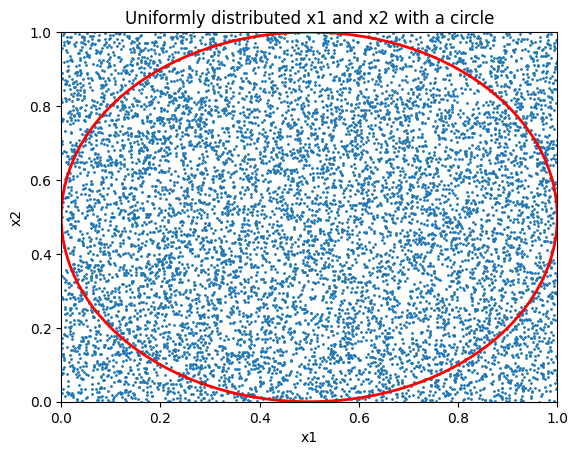

In [475]:
# Generate 10,000 samples of x1 and x2 pairs
x1 = np.random.uniform(0, 1, 10000)
x2 = np.random.uniform(0, 1, 10000)

fig, ax = plt.subplots()
ax.scatter(x1, x2, s=1)

circle = Circle((0.5, 0.5), 0.5, edgecolor='r', facecolor='none',linewidth=2.0)
ax.add_patch(circle)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Uniformly distributed x1 and x2 with a circle')
plt.show()

In [476]:
# Calculate the distance of each point from the center of the circle
distances = np.sqrt((x1 - 0.5)**2 + (x2 - 0.5)**2)

# Count the number of points inside the circle
inside_circle = np.sum(distances <= 0.5)

# Count the number of points outside the circle
outside_circle = np.sum(distances > 0.5)

# Calculate the ratio
ratio = inside_circle / (outside_circle+inside_circle)
print('inside_circle', inside_circle)
print('tot', outside_circle+inside_circle)
print('Ratio', ratio)
ratio

pi_estimate = 4 * ratio
print('Estimated value of pi:', pi_estimate)

inside_circle 7854
tot 10000
Ratio 0.7854
Estimated value of pi: 3.1416


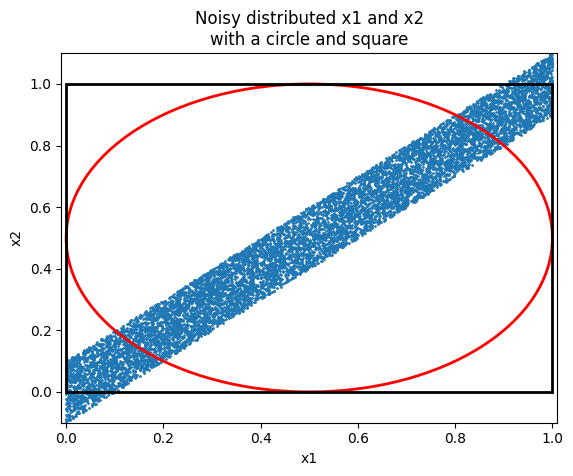

In [477]:
# Generate 10,000 samples of x1 and x2 pairs
x1 = np.random.uniform(0, 1, 10000)
x2 = x1+np.random.uniform(-0.1,0.1, 10000)

fig, ax = plt.subplots()
ax.scatter(x1, x2, s=1)

circle = Circle((0.5, 0.5), 0.5, edgecolor='r', facecolor='none',linewidth=2.0)
square = Rectangle((0, 0), 1, 1, edgecolor='k', facecolor='none',linewidth=2.0)
ax.add_patch(circle)
ax.add_patch(square)

ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Noisy distributed x1 and x2\nwith a circle and square')
plt.show()

In [478]:
# Calculate the distance of each point from the center of the circle
distances = np.sqrt((x1 - 0.5)**2 + (x2 - 0.5)**2)

# Count the number of points inside the circle
inside_circle = np.sum(distances <= 0.5)

# Count the number of points outside the circle
outside_circle = np.sum(distances > 0.5)

# Calculate the ratio
ratio = inside_circle / (outside_circle+inside_circle)
print('inside_circle', inside_circle)
print('tot', outside_circle+inside_circle)
print('Ratio', ratio)

pi_estimate = 4 * ratio
print('Estimated value of pi:', pi_estimate)



inside_circle 7016
tot 10000
Ratio 0.7016
Estimated value of pi: 2.8064


In [479]:
E_R=0*0.35+5*0.3+10*0.25+20*0.1
print('expected value of R:', E_R)

expected value of R: 6.0


In [480]:
E_S=0*0.3+5*0.35+10*0.3+20*0.05
print('expected value of S:', E_S)

expected value of S: 5.75


In [481]:
rewards = [0, 5, 10, 20]

def slot_machine_R(n):
    ''' 
    Simulate n plays of slot machine R
    '''
    rewards = [0, 5, 10, 20]
    probabilities = [0.35, 0.3, 0.25, 0.1]
    return np.random.choice(rewards, p=probabilities,size=n)

def slot_machine_S(n):
    ''' 
    Simulate n plays of slot machine S
    '''
    rewards = [0, 5, 10, 20]
    probabilities = [0.3, 0.35, 0.3, 0.05]
    return np.random.choice(rewards, p=probabilities,size=n)



In [482]:
samples_S=slot_machine_S(10000)
E_emp_S = np.mean(samples_S)
print('Empirical expected value of S:', E_emp_S)


Empirical expected value of S: 5.7135


In [483]:
ratios=[r/s for r,s in zip([0.35, 0.3, 0.25, 0.1],[0.3, 0.35, 0.3, 0.05])]
print('Ratios:', ratios)

Ratios: [1.1666666666666667, 0.8571428571428572, 0.8333333333333334, 2.0]


In [484]:
# Task 5
def estimate_expected_value_R(samples_S, ratios,rewards):
    """
    Estimate the expected value of slot machine R using samples from slot machine S
    and the ratio ρ.
    
    Parameters:
    - samples_S: Array containing samples from slot machine S
    - ratios: Array containing the ratios of probabilities of corresponding rewards between R and S
    
    Returns:
    - Estimated expected value of slot machine R
    """
    # Initialize variables to store weighted sum and sum of weights
    weighted_sum = 0
    sum_weights = 0
    
    # Iterate through each sample from slot machine S
    for sample_S in samples_S:
        # Find the index of the reward in the samples list
        sample_index = rewards.index(sample_S) # Assuming rewards are in multiples of 5
        
        # Calculate weight for the sample using the corresponding ratio
        weight = ratios[sample_index]
        
        # Update weighted sum and sum of weights
        weighted_sum += weight * sample_S
        sum_weights += weight
    
    # Compute the estimated expected value of R
    estimated_expected_value_R = weighted_sum / sum_weights
    
    return estimated_expected_value_R

# Use the function to estimate expected value of R
estimated_expected_value_R = estimate_expected_value_R(samples_S, ratios,rewards)
print('Estimated expected value of R using importance sampling:', estimated_expected_value_R)


Estimated expected value of R using importance sampling: 5.9849578706390485


In [485]:
unique, counts = np.unique(samples_S, return_counts=True)
print('Unique:', unique)
print('Counts:', counts)

Unique: [ 0  5 10 20]
Counts: [3029 3541 2917  513]


In [486]:
[count*reward*ratio for count,reward,ratio in zip(counts,unique,ratios)]

[0.0, 15175.714285714286, 24308.333333333336, 20520.0]

In [487]:
sum([count*reward*ratio for count,reward,ratio in zip(counts,unique,ratios)])/sum(counts)

6.000404761904762

In [488]:
# Task 5
def estimate_expected_value_R(samples_S, ratios, rewards):
    """
    Estimate the expected value of slot machine R using samples from slot machine S
    and the ratio ρ.
    
    Parameters:
    - samples_S: Array containing samples from slot machine S
    - ratios: Array containing the ratios of probabilities of corresponding rewards between R and S
    - rewards: Array containing possible rewards
    
    Returns:
    - Estimated expected value of slot machine R
    """
    # Find the unique samples and their counts
    unique_samples, counts = np.unique(samples_S, return_counts=True)
    
    # Find the indices of unique samples in the rewards array
    # sample_indices = np.searchsorted(rewards, unique_samples)
    
    # Calculate weights for each unique sample using the corresponding ratios
    weights = np.array(ratios)
    
    # Compute weighted sum and sum of weights
    weighted_sum = np.sum(weights * unique_samples * counts)
    sum_weights = np.sum(weights * counts)
    print('weighted_sum', weighted_sum)
    print('sum_weights', sum_weights)
    
    # Compute the estimated expected value of R
    estimated_expected_value_R = weighted_sum / sum_weights
    
    return estimated_expected_value_R



# Use the function to estimate expected value of R
estimated_expected_value_R = estimate_expected_value_R(samples_S, ratios, rewards)
print('Estimated expected value of R using importance sampling:', estimated_expected_value_R)


weighted_sum 60004.047619047626
sum_weights 10025.809523809525
Estimated expected value of R using importance sampling: 5.984957870638637


In [489]:
# np.random.seed()
def slot_machine_S(n):
    ''' 
    Simulate n plays of slot machine S
    '''
    rewards = [0, 5, 10, 20]
    probabilities = [0.25,0.25,0.25,0.25]
    return np.random.choice(rewards, p=probabilities,size=n)

samples_S_new = slot_machine_S(10000)
unique, counts = np.unique(samples_S_new, return_counts=True)
print('rewards:', unique)
print('Counts:', counts)
E_emp_S = np.mean(samples_S_new)
print('Empirical expected value of S:', E_emp_S)
ratios=[r/s for r,s in zip([0.35, 0.3, 0.25, 0.1],[0.25,0.25,0.25,0.25])]
print('Ratios:', ratios)


rewards: [ 0  5 10 20]
Counts: [2477 2441 2507 2575]
Empirical expected value of S: 8.8775
Ratios: [1.4, 1.2, 1.0, 0.4]


In [490]:
estimated_expected_value_R = estimate_expected_value_R(samples_S_new, ratios, rewards)
print('Estimated expected value of R using importance sampling:', estimated_expected_value_R)

weighted_sum 60316.0
sum_weights 9934.0
Estimated expected value of R using importance sampling: 6.0716730420777125


In [491]:
# np.random.seed()
def slot_machine_S(n):
    ''' 
    Simulate n plays of slot machine S
    '''
    rewards = [0, 5, 10, 20]
    probabilities = [0.001,0.499,0.499,0.001]
    return np.random.choice(rewards, p=probabilities,size=n)

samples_S_new = slot_machine_S(10000)
unique, counts = np.unique(samples_S_new, return_counts=True)
print('rewards:', unique)
print('Counts:', counts)
E_emp_S = np.mean(samples_S_new)
print('Empirical expected value of S:', E_emp_S)
ratios=[r/s for r,s in zip([0.35, 0.3, 0.25, 0.1],[0.001,0.499,0.499,0.001])]
print('Ratios:', ratios)


rewards: [ 0  5 10 20]
Counts: [   3 5000 4980   17]
Empirical expected value of S: 7.514
Ratios: [349.99999999999994, 0.6012024048096192, 0.501002004008016, 100.0]


In [492]:
estimated_expected_value_R = estimate_expected_value_R(samples_S_new, ratios, rewards)
print('Estimated expected value of R using importance sampling:', estimated_expected_value_R)

weighted_sum 73979.95991983968
sum_weights 8251.002004008016
Estimated expected value of R using importance sampling: 8.966178881535004
